In [1]:
%load_ext autoreload
%autoreload 2

In [ ]:
from IPython.display import IFrame

IFrame('Boyce_12e_PPT_ch02_3.pdf', width=1000, height=700)

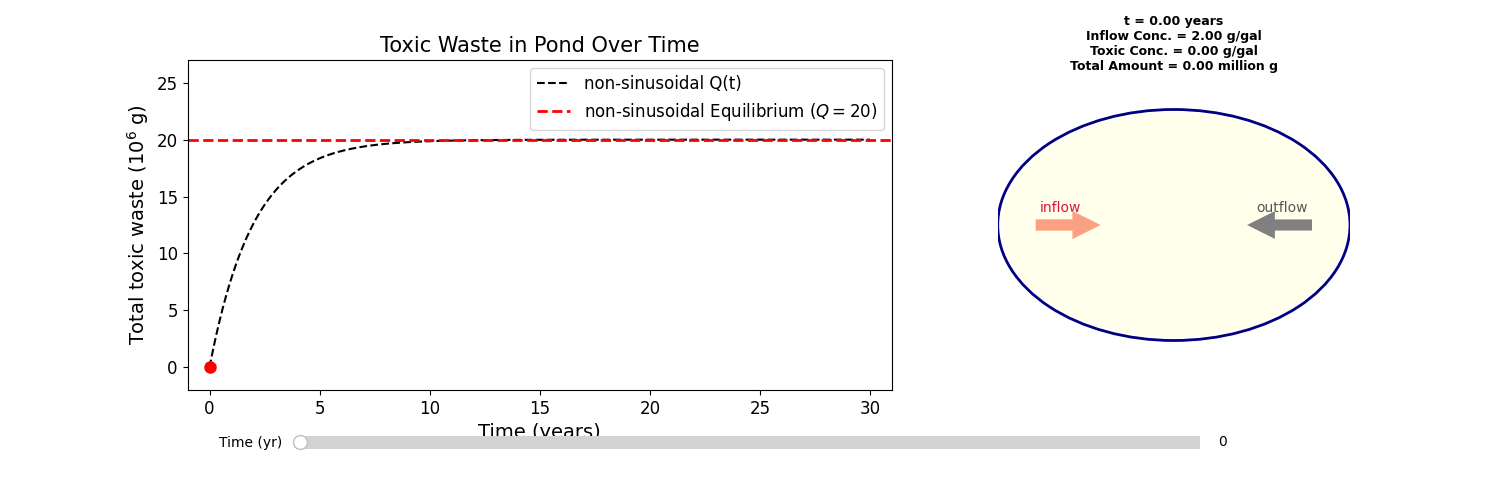

In [12]:
%matplotlib widget
from demo import run_demo

run_demo()
